## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [8]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [9]:
from src.models.LDA import LDA, plot_topic_distribution
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=15, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

In [10]:
# lda.plot_coherence(topic_interval=(2, 25), passes=100, savefig='LDA_coherence')

### Build model and Print topics

In [11]:
model = lda.build_LDA_model(num_topics=8, passes=1000)
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.024*"utvalg" + 0.016*"tiltak" + 0.015*"rapport" + 0.012*"klimamål" + 0.012*"samfunn" + 0.012*"norge" + 0.012*"klimapolitikk" + 0.011*"konsekvens" + 0.010*"mål" + 0.009*"lavutslippssamfunn"')
(1, '0.030*"utslipp" + 0.023*"norsk" + 0.023*"norge" + 0.018*"redusere" + 0.014*"øke" + 0.012*"skog" + 0.012*"tonn" + 0.011*"global" + 0.011*"prosent" + 0.010*"matproduksjon"')
(2, '0.024*"norge" + 0.023*"fornybar" + 0.021*"kraft" + 0.021*"legge" + 0.020*"energi" + 0.018*"høy" + 0.018*"norsk" + 0.016*"rett" + 0.016*"økonomi" + 0.015*"lav"')
(3, '0.020*"kommune" + 0.018*"natur" + 0.017*"utvalg" + 0.017*"støtte" + 0.016*"burde" + 0.011*"nasjonal" + 0.010*"klima" + 0.010*"helhetlig" + 0.010*"lavutslippssamfunn" + 0.009*"forslag"')
(4, '0.017*"produksjon" + 0.017*"energi" + 0.014*"bruke" + 0.013*"liten" + 0.012*"bruk" + 0.011*"norge" + 0.011*"øke" + 0.011*"produsere" + 0.011*"fornybar" + 0.011*"stor"')
(5, '0.022*"utvalg" + 0.021*"utslipp" + 0.015*"norsk" + 0.015*"norge" + 0.013*"virkemiddel" + 

### Calculate text-topic pairs

In [12]:
predictions = lda.predict_topics(model=model, relevancy=False)
dataframe['topic_predictions'] = predictions

dataframe.head(n=100)

,actor,text,date,actor_label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,Interessegruppe,"{'topic': 6, 'confidence': 0.85}"
1,Abelia,Innledningsvis vil vi takke for det grundige o...,30.01.2024,Interessegruppe,"{'topic': 0, 'confidence': 0.56}"
2,Abelia,Vi er enig med utvalget i at klimapolitikken m...,30.01.2024,Interessegruppe,"{'topic': 0, 'confidence': 0.51}"
3,Abelia,Over de siste åtte årene har Abelia målt norsk...,30.01.2024,Interessegruppe,"{'topic': 4, 'confidence': 0.45}"
4,Abelia,Vi vil gjerne oppfordre til at det blir satt s...,30.01.2024,Interessegruppe,"{'topic': 3, 'confidence': 0.91}"
...,...,...,...,...,...
95,Animalia AS,Klimaplan 2050s analyse og situasjonsbeskrivel...,30.01.2024,Bedrift,"{'topic': 0, 'confidence': 0.4}"
96,Animalia AS,Matsikkerhet er en utfordring som må møtes par...,30.01.2024,Bedrift,"{'topic': 1, 'confidence': 0.64}"
97,Animalia AS,Begrepet bærekraftig utvikling ble introdusert...,30.01.2024,Bedrift,"{'topic': 0, 'confidence': 0.45}"
98,Animalia AS,"Bærekraftmål nr. 2 er å “utrydde sult, oppnå m...",30.01.2024,Bedrift,"{'topic': 1, 'confidence': 0.56}"


## Plot distributions

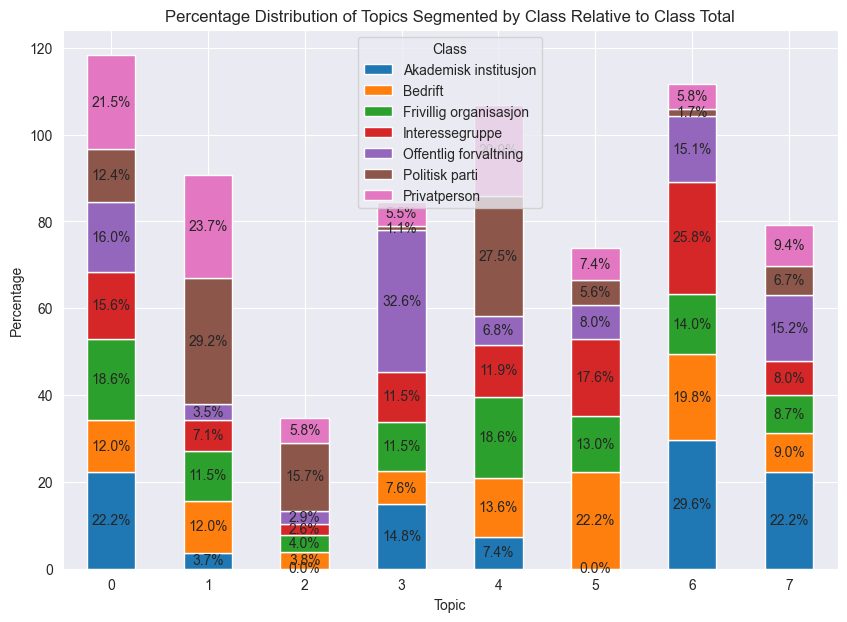

In [13]:
plot_topic_distribution(dataframe, savefig='LDA_Paragraph_distribution')

In [14]:
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation:
/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/spacy

NAME              SPACY            VERSION                            
en_core_web_trf   >=3.7.2,<3.8.0   3.7.3   ✔
nb_core_news_sm   >=3.7.0,<3.8.0   3.7.0   ✔
nb_core_news_md   >=3.7.0,<3.8.0   3.7.0   ✔

